In [1]:
from IPython.display import HTML; HTML(f"""<style>{open("./styles/styles.css").read()}</style>""")

<center>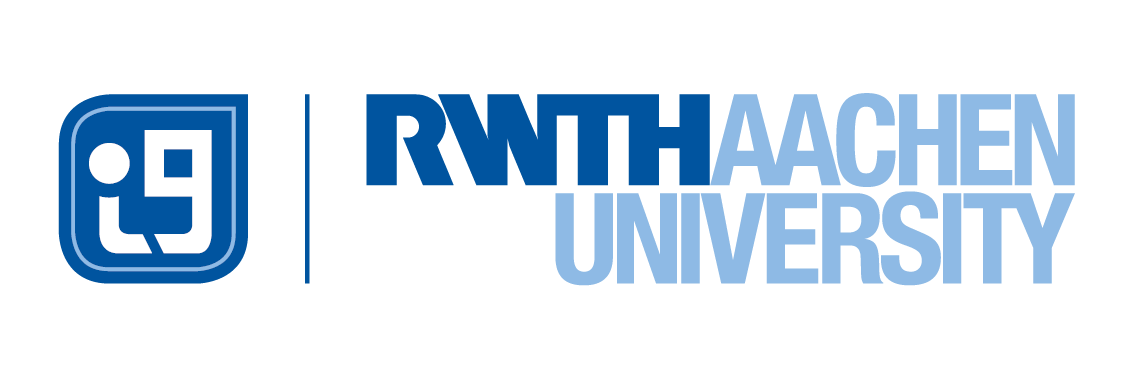</center>

---
<a name="top"></a>
# Introduction into Python
## Overview
* [How to run code](#coderunning)
* [Course: Goals & Overview](#course)
* [Get started](#summary)

---
<a name="coderunning"></a>
## [How to run code in JupyterLab](#top)
* #### Select a Code Cell:
    A Jupyter notebook is composed of cells, and you can identify code cells by the In [ ]: prompt on the left side. Click on a code cell to select it. Alternatively, you can use arrow keys to navigate to a code cell.
* #### Run the Code Cell:
    Once you have a code cell selected, you can run the code inside it. There are several ways to do this:
    * Press Shift + Enter: This keyboard shortcut runs the current cell and moves the focus to the next cell (or creates a new cell if none exists).
    * Click the "Run" button: You can find this button in the toolbar above the notebook interface. It looks like a "play" button ▶.
    * Go to the "Run" menu and select "Run Selected Cells": This menu option is another way to run the code in the selected cell.
* #### View Output:
    After running a code cell, any output generated by the code (e.g., print statements, plot visualizations) will appear directly below the cell.
* #### Continue Running Cells:
    You can continue running code cells in the notebook, either by selecting them manually or by using keyboard shortcuts to navigate through the notebook.
* #### Save Your Work:
    Remember to save your changes periodically by clicking the save button in the toolbar or by using the keyboard shortcut (Ctrl + S or Cmd + S on Mac).

---
<a name="course"></a>
## [Course overview](#top)

* Introduction
* Data Structures
* Control Statements
* Functions
* External Modules & Reference Semantic
* Functional Programming & Iterators
* File Handling & Exceptions
* Pandas
* NumPy
* Matplotlib

## Analyzing statistics for songs of various Spotify artists

As an example we show you how to use Python to explore a dataset containing information about more than 20000 songs (it is real data form Spotify and Youtube!). You can use the insights from such an analysis to create models which will predict the success of a new song or to find out which properties the most successful ones have, so that you can write the next Hit. An analysis of such a big dataset would be impossible without the help of a computer.

### Data Preprocessing

First we read the data file.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./data/Spotify_Youtube.csv")
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


Now we can use the data in our code. For example we can check how many rows are contained in the dataset...

In [3]:
print("There are {} Rows in the dataset.".format(len(df)))

There are 20718 Rows in the dataset.


... or compute the average song duration of all 20000 songs:

In [4]:
avg_duration = df["Duration_ms"].mean()
print("On average a song is {:.2f} minutes long".format(avg_duration/60000))

On average a song is 3.75 minutes long


To analyze the data in a little more detail, we first have to preprocess the data and remove all the columns we are not interested in, like the Url of a song:

In [5]:
df.drop(["Unnamed: 0", "Url_spotify", "Uri", "Url_youtube"], axis=1, inplace=True)
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Licensed',
       'official_video', 'Stream'],
      dtype='object')

Now we want to check if some of the data is missing in our dataset:

In [6]:
missing_values = df.isnull().sum()
missing_values

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

Incomplete data is a typical problem in data analysis (Note that a missing value does not have to be an error, it depends on the dataset you have). One approach to deal with it, is to fill the missing values with the mean value of it's column. We will simply remove all the data rows which are not complete, so that we only work with correctly recorded and complete instances: 

In [7]:
df.dropna(inplace=True)
print("After cleaning the data we have {} rows left".format(len(df)))

After cleaning the data we have 19170 rows left


### Exploration and Visualization

Now that we have prepared the data, we can use the visualization tools from `matplotlib` to explore it. Let's list the most successful songs in terms of the number of streams on spotify:

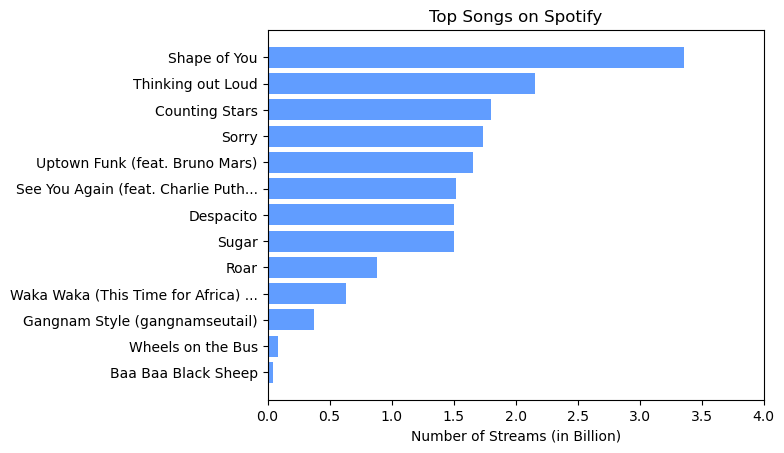

In [8]:
from unidecode import unidecode

# helper function to truncate the song title
def truncate(text):
    maxLen = 33
    if(len(text) > maxLen):
        return unidecode(text[0:maxLen] + "...")
    else:
        return unidecode(text)

    
    
# filter out top songs
topSongs = df.nlargest(15, "Views", keep="all").drop_duplicates("Track").sort_values("Stream")
topSongs['Track'] = topSongs['Track'].map(truncate)

# plot songs in a bar chart
fig, ax = plt.subplots()
ax.barh(topSongs["Track"], topSongs["Stream"], color="#619DFF")
ax.xaxis.set_ticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Top Songs on Spotify")
ax.set_xlabel("Number of Streams (in Billion)")

plt.show()

We can also look at the top Songs regarding the number of views on youtube:

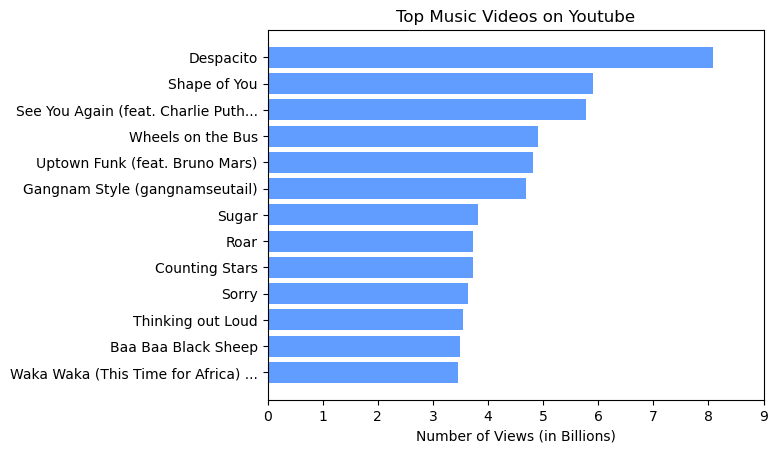

In [9]:
# filter out top songs
topSongs = df.nlargest(15, "Views", keep="all").drop_duplicates("Track").sort_values("Views")
topSongs['Track'] = topSongs['Track'].map(truncate)

# plot songs in a bar chart
fig, ax = plt.subplots()
ax.barh(topSongs["Track"], topSongs["Views"], color="#619DFF")
ax.xaxis.set_ticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Top Music Videos on Youtube")
ax.set_xlabel("Number of Views (in Billions)")

plt.show()

The dataset provides us with many features for every song. We can look at the distribution of some of these features, to get get a better feeling for the range in which most of the songs can be found:

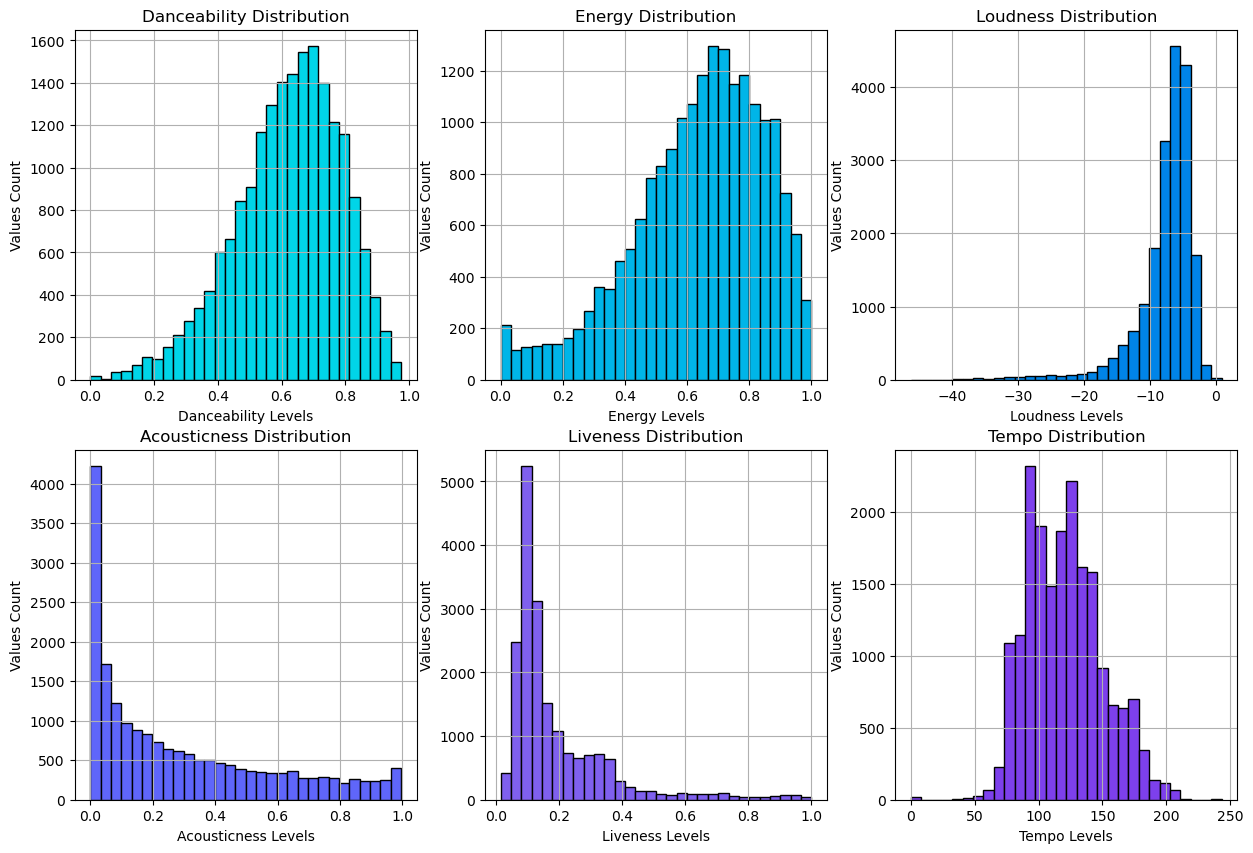

In [10]:
fig, axs = plt.subplots(2,3,figsize=(15,10))

binSize = 30

axs[0,0].hist(df["Danceability"], binSize, color = "#00d5e8", ec="black")
axs[0,0].set_title("Danceability Distribution")
axs[0,0].set_xlabel("Danceability Levels")
axs[0,0].set_ylabel("Values Count")
axs[0,0].grid(True)

axs[0,1].hist(df["Energy"], binSize, color = "#00b5e8", ec="black")
axs[0,1].set_title("Energy Distribution")
axs[0,1].set_xlabel("Energy Levels")
axs[0,1].set_ylabel("Values Count")
axs[0,1].grid(True)

axs[0,2].hist(df["Loudness"], binSize, color = "#0084e8", ec="black")
axs[0,2].set_title("Loudness Distribution")
axs[0,2].set_xlabel("Loudness Levels")
axs[0,2].set_ylabel("Values Count")
axs[0,2].grid(True)

axs[1,0].hist(df["Acousticness"], binSize, color = "#5f66fa", ec="black")
axs[1,0].set_title("Acousticness Distribution")
axs[1,0].set_xlabel("Acousticness Levels")
axs[1,0].set_ylabel("Values Count")
axs[1,0].grid(True)

axs[1,1].hist(df["Liveness"], binSize, color = "#7f60ee", ec="black")
axs[1,1].set_title("Liveness Distribution")
axs[1,1].set_xlabel("Liveness Levels")
axs[1,1].set_ylabel("Values Count")
axs[1,1].grid(True)

axs[1,2].hist(df["Tempo"], binSize, color = "#7d40ec", ec="black")
axs[1,2].set_title("Tempo Distribution")
axs[1,2].set_xlabel("Tempo Levels")
axs[1,2].set_ylabel("Values Count")
axs[1,2].grid(True)

plt.show()

We can also analyze the relationship among these features:

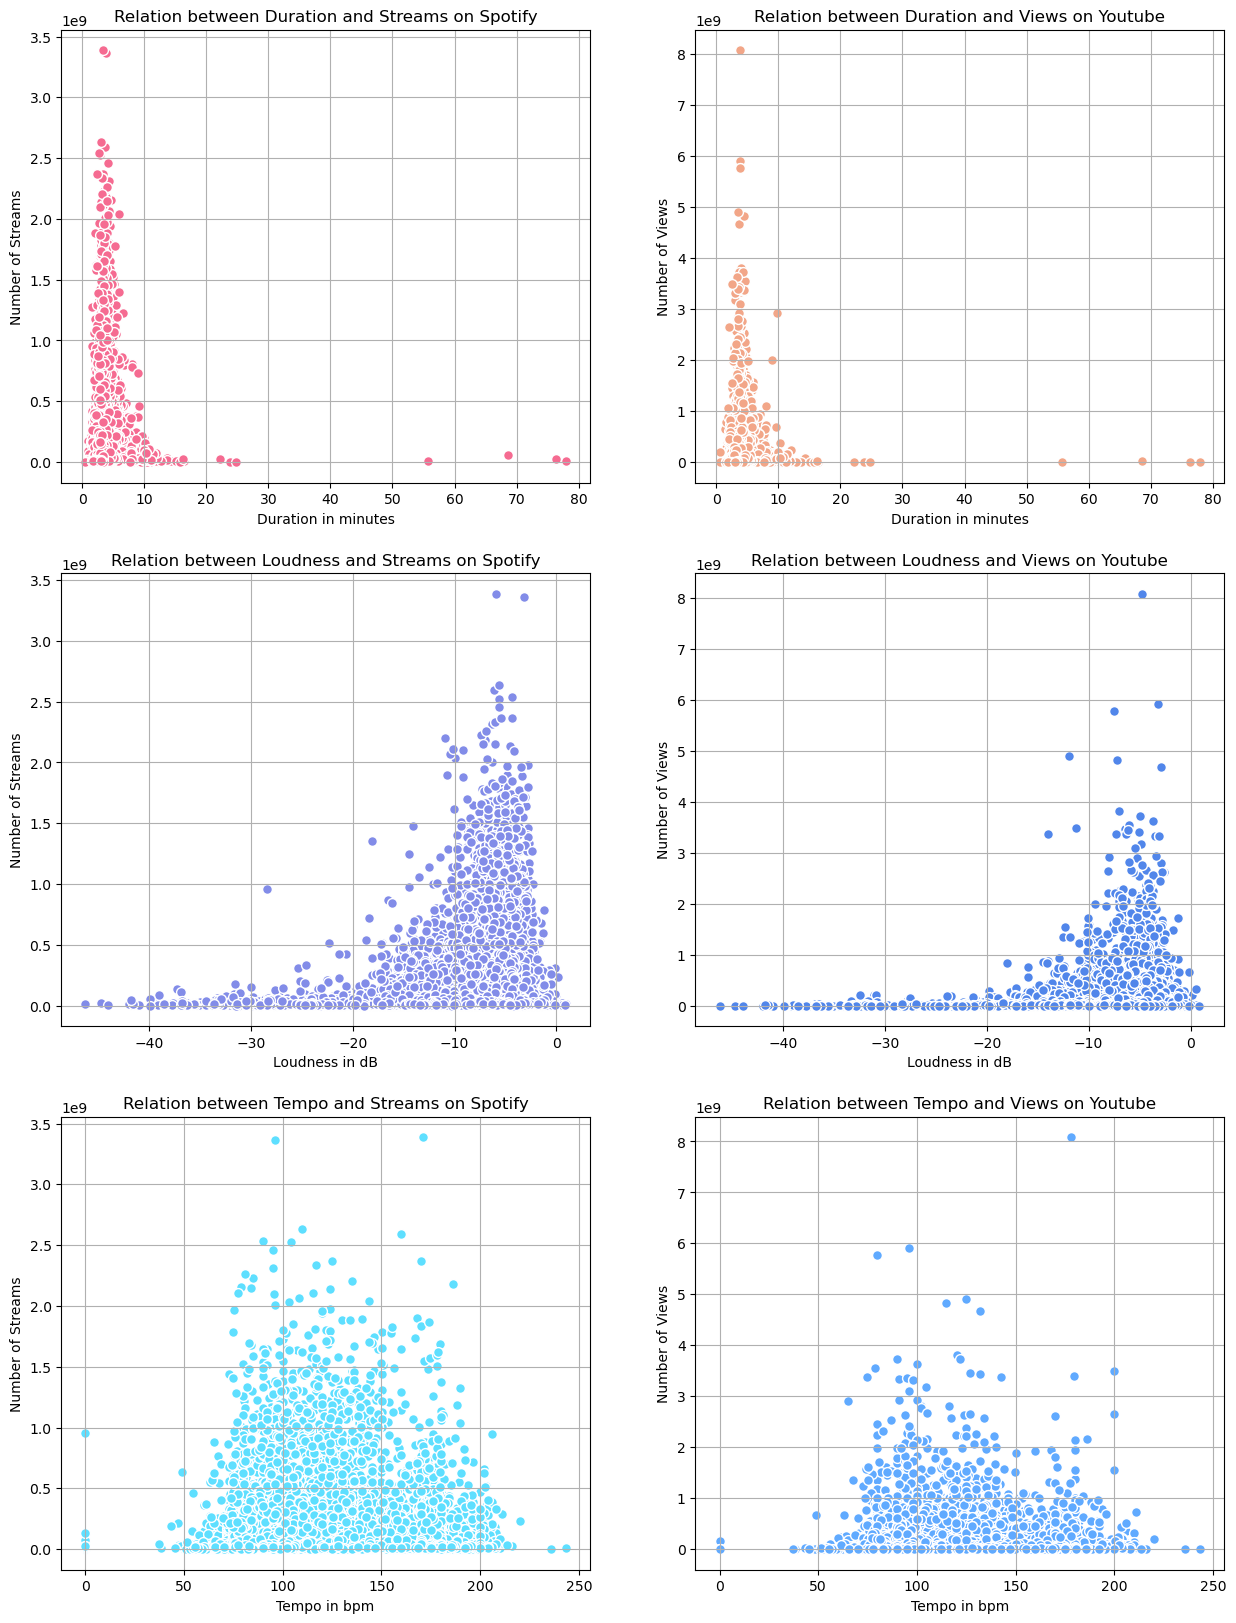

In [11]:
fig, axs=plt.subplots(3,2,figsize=(15,20))

axs[0,0].scatter(df["Duration_ms"]/60000, df["Stream"], color = "#F56B91", ec="white", s=50)
axs[0,0].set_xlabel("Duration in minutes")
axs[0,0].set_ylabel("Number of Streams")
axs[0,0].set_title("Relation between Duration and Streams on Spotify")
axs[0,0].grid(True)

axs[0,1].scatter(df["Duration_ms"]/60000, df["Views"], color = "#F2A688", ec="white", s=50)
axs[0,1].set_xlabel("Duration in minutes")
axs[0,1].set_ylabel("Number of Views")
axs[0,1].set_title("Relation between Duration and Views on Youtube")
axs[0,1].grid(True)

axs[1,0].scatter(df["Loudness"], df["Stream"], color = "#828CE8", ec="white", s=50)
axs[1,0].set_xlabel("Loudness in dB")
axs[1,0].set_ylabel("Number of Streams")
axs[1,0].set_title("Relation between Loudness and Streams on Spotify")
axs[1,0].grid(True)

axs[1,1].scatter(df["Loudness"], df["Views"], color = "#5186EA", ec="white", s=50)
axs[1,1].set_xlabel("Loudness in dB")
axs[1,1].set_ylabel("Number of Views")
axs[1,1].set_title("Relation between Loudness and Views on Youtube")
axs[1,1].grid(True)

axs[2,0].scatter(df["Tempo"], df["Stream"], color = "#5EDFFF", ec="white", s=50)
axs[2,0].set_xlabel("Tempo in bpm")
axs[2,0].set_ylabel("Number of Streams")
axs[2,0].set_title("Relation between Tempo and Streams on Spotify")
axs[2,0].grid(True)

axs[2,1].scatter(df["Tempo"], df["Views"], color = "#60AAFF", ec="white", s=50)
axs[2,1].set_xlabel("Tempo in bpm")
axs[2,1].set_ylabel("Number of Views")
axs[2,1].set_title("Relation between Tempo and Views on Youtube")
axs[2,1].grid(True)



plt.show()

This is just a small glimpse into the possibilities that Python provides. There much more (and also more complex) visualization and analysis tools you can use.

---
<a name="summary"></a>
## [Summary & Exercise](#top)
Now you know how to work with notebooks, so go ahead!